In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train/255., X_valid/255. , X_test/255.

In [2]:
class DigitClassificationModel(tf.keras.Model):
    def __init__(self, units=50, activation='relu', classes=10, **kwargs):
        super(DigitClassificationModel, self).__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.output_layer = tf.keras.layers.Dense(classes, activation='softmax')

    def call(self, inputs):
        x1 = self.flatten(inputs)
        x2 = self.hidden1(x1)
        x3 = self.hidden2(x2)
        return self.output_layer(x3)
    
model = DigitClassificationModel(200)

In [3]:
from pathlib import Path
from time import strftime

def get_run_logidir(root_logdir="digit_classification_logs"):
    return Path(root_logdir)/strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logidir()
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(run_logdir)

In [4]:
model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=tf.keras.metrics.sparse_categorical_accuracy
)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid), callbacks=tensorboard_callbacks)

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2040 - sparse_categorical_accuracy: 0.9385 - val_loss: 0.1036 - val_sparse_categorical_accuracy: 0.9662
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0935 - sparse_categorical_accuracy: 0.9712 - val_loss: 0.0964 - val_sparse_categorical_accuracy: 0.9740
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0710 - sparse_categorical_accuracy: 0.9773 - val_loss: 0.0793 - val_sparse_categorical_accuracy: 0.9770
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0577 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.1148 - val_sparse_categorical_accuracy: 0.9726
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0476 - sparse_categorical_accuracy: 0.9853 - val_loss: 0.0930 - val_sparse_categorical_accuracy: 0.9774
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0415 - spars

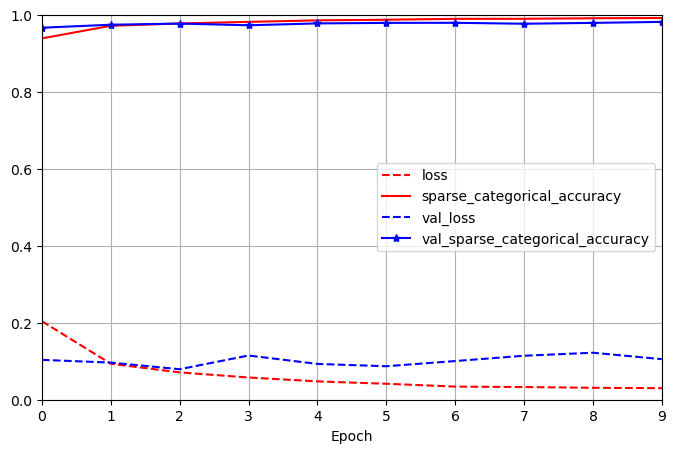

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize = (8,5), xlim=[0,9], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()

### TensorBoard View:
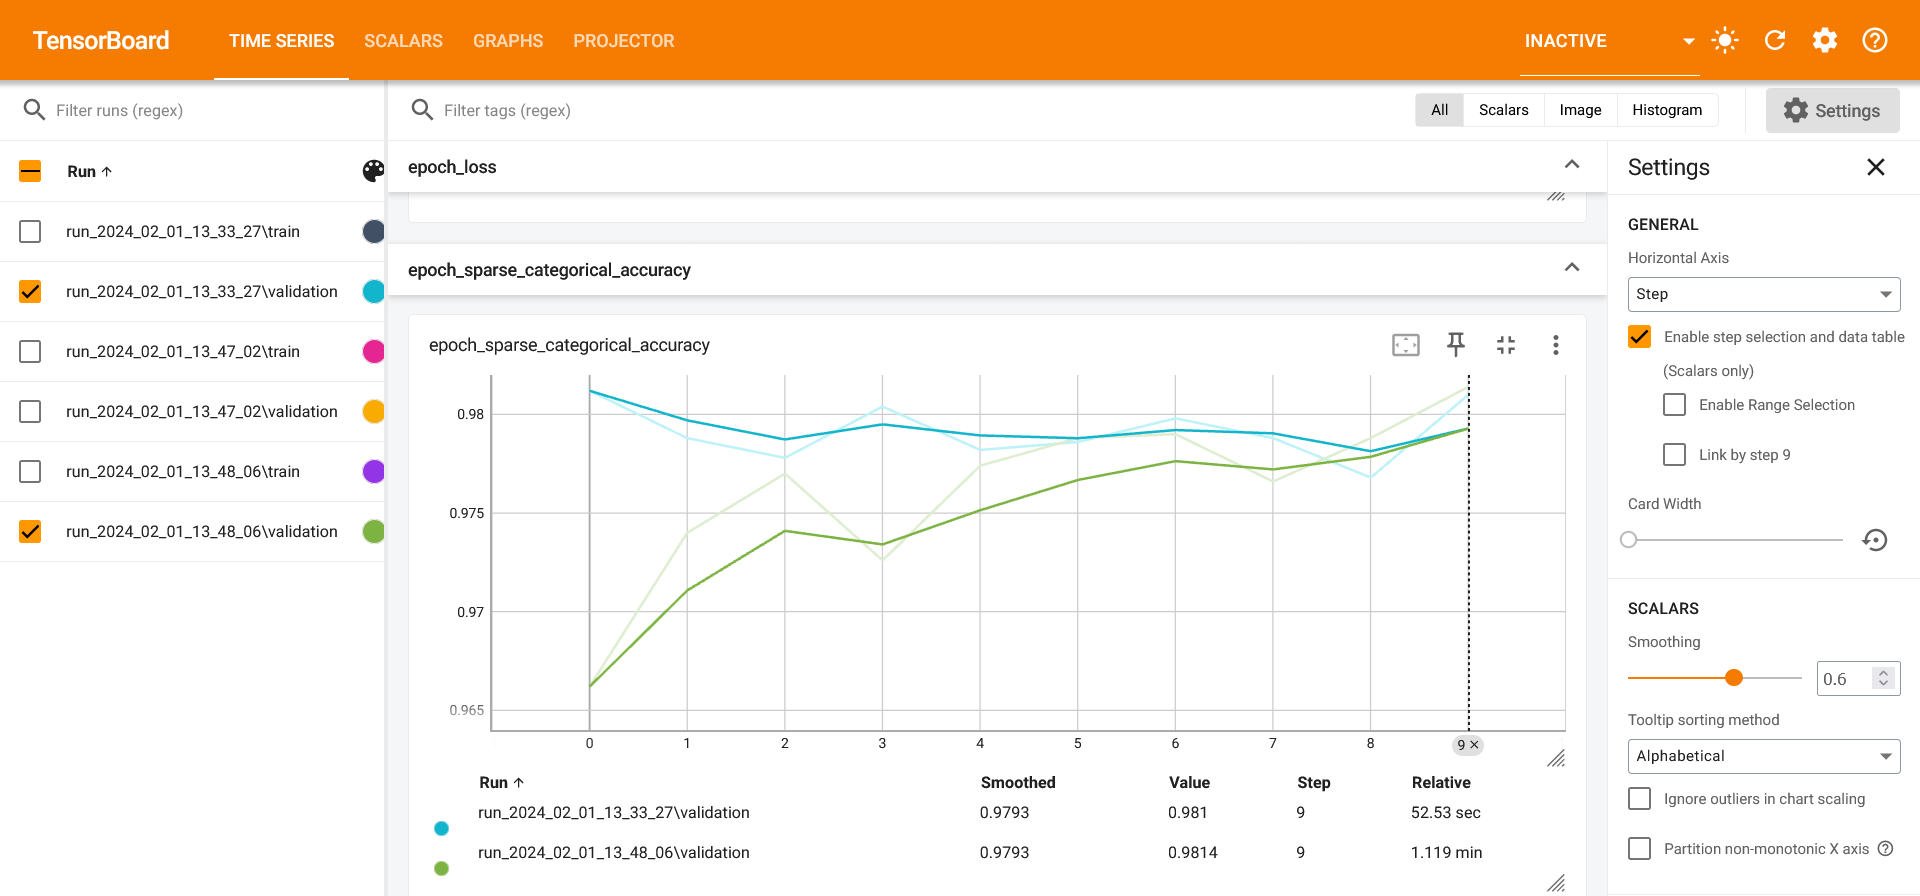